<a href="https://colab.research.google.com/github/chelo122-code/codiguinio/blob/main/elcodiguinio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

libreria importante para leer los datos

In [1]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.7 MB/s eta 0:00:00


Tamaño de la lista: 50860
Valores: [-3.33 -3.5  -3.5  ...  0.5   0.5   0.83]
valores random [-7.96199434  2.07481438  1.36747131 ... -0.61165729  2.33690628
  3.38378482]
Promedio de los valores: 0.02
Desviación estándar de los valores: 8.16
Coeficiente de variación de los valores: 408.0
La suma de los cuadrados de los elementos del array es: 66.54710799056234
La suma de los cuadrados de los elementos del array es: 25.302296697689034
SNR: 4.199692426009041


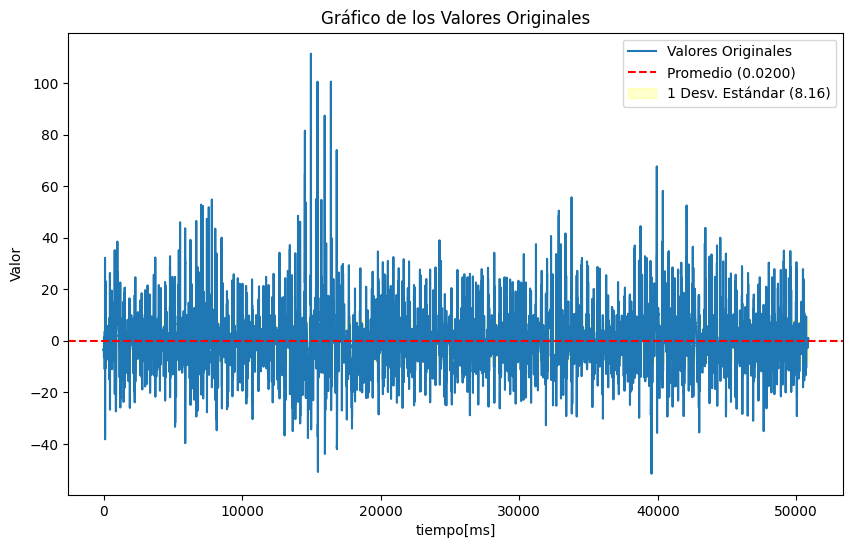

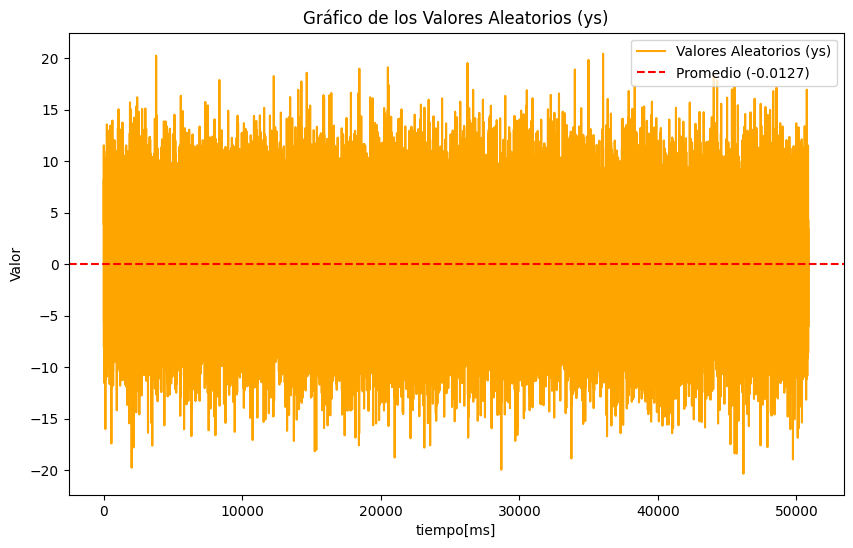

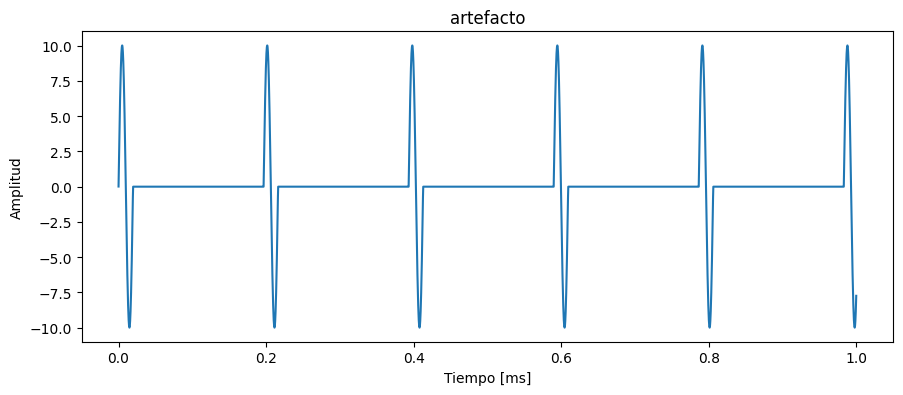

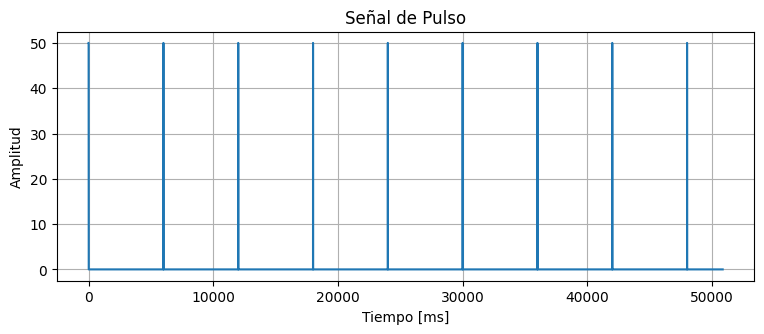

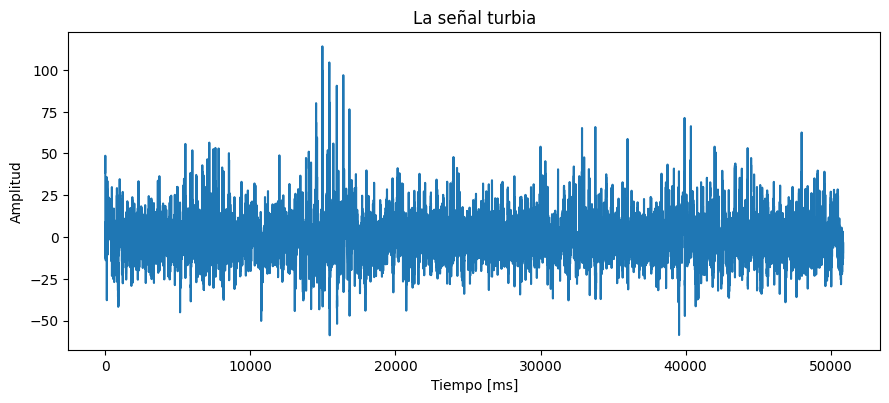

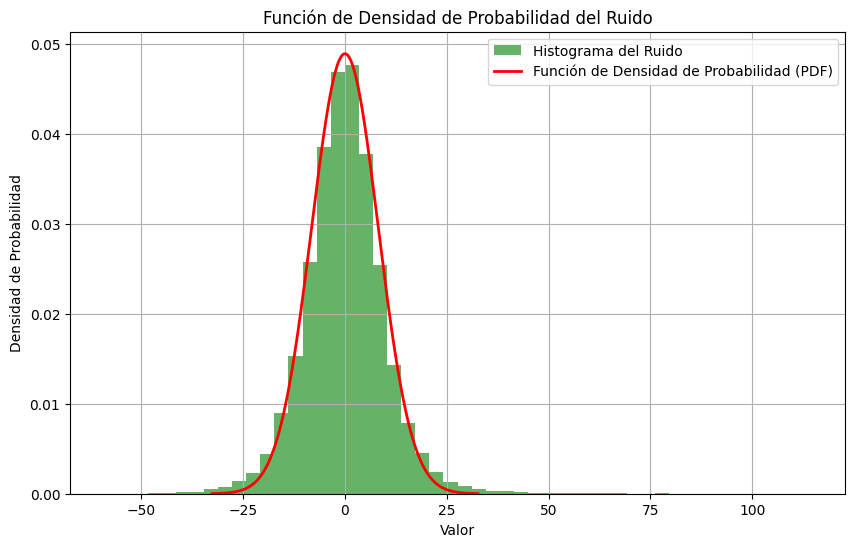

In [3]:
#importamos el paquete para leer "records" de physionet
import wfdb
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

# Cargar la información (con el .dat y .hea ya metidos)
senalcita = wfdb.rdrecord('emg_healthy')
# Obtendremos los valores Y de la señal (solo un canal)
valores = senalcita.p_signal[:, 0]*100  # Selecciona el primer canal


# Generar un array de números aleatorios ys con el mismo tamaño que valores
ys = np.random.randn(len(valores)) * 5

tamano = len(valores)  # Número de muestras

suma_cuadrados = np.sum(valores**2)
suma_val = suma_cuadrados/tamano
suma_cuadrados_ys = np.sum(ys**2)
suma_ys = suma_cuadrados_ys/tamano

# Calcular la relación señal a ruido (SNR)
SNR = 10 * np.log10(suma_val /suma_ys)



def calcular_promedio(valores):
    return np.mean(valores)

def calcular_desviacion_estandar(valores):
    return np.std(valores)

promedio = calcular_promedio(valores)
desviacion_estandar = calcular_desviacion_estandar(valores)

# Formatear a dos decimales
promedio = round(promedio, 4)
desviacion_estandar = round(desviacion_estandar, 2)
coeficiente_variacion = desviacion_estandar / promedio

# Suponiendo que tienes una señal original
fs = tamano # Frecuencia de muestreo
t1 = np.linspace(0, tamano, fs, endpoint=False)  # Vector de tiempo
t = np.linspace(0, 1, fs, endpoint=False)
# Generamos un artefacto: una onda senoidal de alta frecuencia

# Parámetros de la señal de pulso
frecuencia_pulso2 = 1 / 1000  # Frecuencia del pulso en Hz
ancho_pulso2 = 100  # Ancho del pulso en segundos
fc2 = 10  # Frecuencia de muestreo en Hz

# Crear un vector de tiempo
tp2 = np.arange(0, 5086, 1/fc2)

# Generar la señal de pulso
senal_pulso2 = np.zeros_like(tp2)
for i in range(len(tp2)):
    if (i / fc2) % (1 / frecuencia_pulso2) < ancho_pulso2:
        senal_pulso2[i] = 0.01

# Parámetros del artefacto
frecuencia_artefacto2 = 1/100  # Frecuencia del artefacto en Hz
amplitud_artefacto2 = 10  # Amplitud del artefacto

# Generar la señal de artefacto
artefacto2 = amplitud_artefacto2 * np.sin(2 * np.pi * frecuencia_artefacto2 * tp2)

# Sumar la señal de pulso con el artefacto solo cuando el pulso está alto
artefacto = senal_pulso2 + artefacto2 * (senal_pulso2 != 0)


# Parámetros de la señal
frecuencia_pulso = 1/6000  # Frecuencia del pulso en Hz
ancho_pulso = 2  # Ancho del pulso en segundos
duracion = 50860  # Duración total de la señal en segundos
fc = 1 # Frecuencia de muestreo en Hz

# Crear un vector de tiempo
tp = np.arange(0, duracion, 1/fc)

# Generar la señal de pulso
senal_pulso = np.zeros_like(tp)
for i in range(len(tp)):
    if (i / fc) % (1 / frecuencia_pulso) < ancho_pulso:
        senal_pulso[i] = 50

# Sumamos el artefacto a la señal original
La_senal = valores + ys + artefacto + senal_pulso

# Generar valores para el eje X
x = np.linspace(promedio - 4*desviacion_estandar, promedio + 4*desviacion_estandar, 50860)

# Calcular la función de densidad de probabilidad
pdf = norm.pdf(x, promedio, desviacion_estandar)


# Imprimimos los resultados obtenidos
print("Tamaño de la lista:", tamano)
print("Valores:", valores)
print("valores random", ys)
print("Promedio de los valores:", promedio)
print("Desviación estándar de los valores:", desviacion_estandar)
print("Coeficiente de variación de los valores:", coeficiente_variacion)
print("la potencia de la señal es:", suma_val)
print("La potencia del ruido es:", suma_ys)
print("SNR:", SNR)

# Graficar los valores originales
plt.figure(figsize=(10, 6))
plt.plot(valores, label='Valores Originales')
plt.axhline(promedio, color='r', linestyle='--', label=f'Promedio ({promedio:.4f})')
plt.fill_between(range(tamano), promedio - desviacion_estandar, promedio + desviacion_estandar, color='yellow', alpha=0.2, label=f'1 Desv. Estándar ({desviacion_estandar:.2f})')
plt.title("Gráfico de los Valores Originales")
plt.xlabel("tiempo[ms]")
plt.ylabel("Valor")
plt.legend()
plt.show()

# Graficar los números aleatorios (ys)
plt.figure(figsize=(10, 6))
plt.plot(ys, label='Valores Aleatorios (ys)', color='orange')
plt.axhline(np.mean(ys), color='r', linestyle='--', label=f'Promedio ({np.mean(ys):.4f})')
plt.title("Gráfico de los Valores Aleatorios (ys)")
plt.xlabel("tiempo[ms]")
plt.ylabel("Valor")
plt.legend()
plt.show()

# Grafica del ruido del artefacto
plt.figure(figsize=(9, 11))
plt.subplot(3, 1, 1)
plt.plot(t, artefacto)
plt.title('artefacto')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# Graficar la señal de pulso
plt.figure(figsize=(9, 11))
plt.subplot(3, 1, 3)
plt.plot(tp, senal_pulso)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.title('Señal de Pulso')
plt.grid(True)
plt.show()

# Grafica la señal con todos los ruidos
plt.figure(figsize=(9, 11))
plt.subplot(3, 1, 2)
plt.plot(t1, La_senal)
plt.title('La señal turbia')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# Graficar el histograma del ruido con la PDF superpuesta
plt.figure(figsize=(10, 6))
plt.hist(La_senal, bins=50, density=True, alpha=0.6, color='g', label='Histograma del Ruido')
plt.plot(x, pdf, 'r-', lw=2, label='Función de Densidad de Probabilidad (PDF)')
plt.title('Función de Densidad de Probabilidad del Ruido')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()
